In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import tensorflow as tf

/usr/local/lib/python3.6/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2020-07-07 11:04:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.36.133, 151.101.36.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.36.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: 'moore.csv.1'

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0.001s  

2020-07-07 11:04:18 (2.39 MB/s) - 'moore.csv.1' saved [2302/2302]



In [3]:
data = pd.read_csv('moore.csv', header=None).values

In [4]:
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]

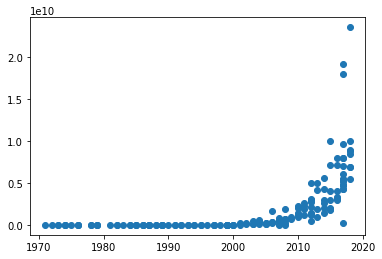

In [5]:
plt.scatter(X, Y);

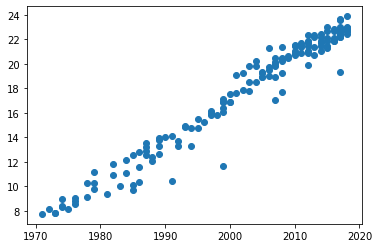

In [6]:
Y = np.log(Y)
plt.scatter(X, Y);

In [7]:
X = X - X.mean()

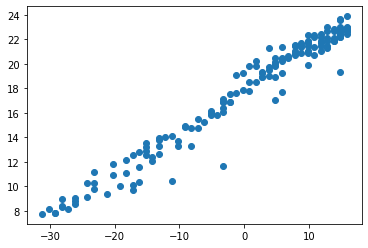

In [8]:
plt.scatter(X, Y);

### Model

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[1,]),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [16]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')

In [17]:
def schedule(epoch, lr):
    if epoch >= 50:
        return 0.001
    return 0.001

In [18]:
scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [19]:
r = model.fit(X, Y, epochs=100, callbacks=[scheduler])

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 372.8788 - lr: 0.0010
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 297.4212 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 203.6518 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 77.7381 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 209.8330 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 1ms/step - loss: 67.2433 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 49.2308 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 1ms/step - loss: 6.2032 - lr: 0.0010
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 32.0475 - lr: 0.0010
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 19.1836 - lr: 0.0010
Epoch 11/100
6/6 [==============================] - 0s 2ms/step - loss: 22.7

Epoch 90/100
6/6 [==============================] - 0s 1ms/step - loss: 1.1862 - lr: 0.0010
Epoch 91/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9820 - lr: 0.0010
Epoch 92/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9800 - lr: 0.0010
Epoch 93/100
6/6 [==============================] - 0s 1ms/step - loss: 1.0676 - lr: 0.0010
Epoch 94/100
6/6 [==============================] - 0s 1ms/step - loss: 1.2496 - lr: 0.0010
Epoch 95/100
6/6 [==============================] - 0s 1ms/step - loss: 1.3139 - lr: 0.0010
Epoch 96/100
6/6 [==============================] - 0s 1ms/step - loss: 1.3463 - lr: 0.0010
Epoch 97/100
6/6 [==============================] - 0s 1ms/step - loss: 1.3514 - lr: 0.0010
Epoch 98/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0923 - lr: 0.0010
Epoch 99/100
6/6 [==============================] - 0s 2ms/step - loss: 1.0006 - lr: 0.0010
Epoch 100/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9899 

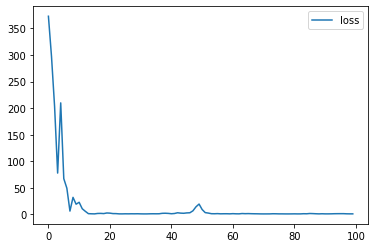

In [20]:
plt.plot(r.history['loss'], label='loss')
plt.legend();